In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/warnings.csv", sep=",")

In [3]:
df_warnings = df[df['type'] == 'Warning']
df_warnings

,warning_id,top_section_id,top_section_title,topic_section_id,topic_section,type,warning_text
0,ecls_bio_becls_a2_a110813107.SL110812866.2705,ecls_bio_becls_a2_a106607236.SL63315217.2655,Sensors of the vehicle,ecls_bio_becls_a2_a110846472.SL102599775.2698,Radar sensors,Warning,The vehicle radar sensors and thus also the dr...
1,ecls_bio_becls_a2_a108647234.SL56026713.11055,ecls_bio_becls_a2_a109147002.SL63315233.10944,Driving stability control systems,ecls_bio_becls_a2_a109904174.SL83497487.11045,Operation via M1/M2,Warning,"Depending on the setting, the DSC may only be ..."
2,ecls_bio_becls_a2_a108648087.SL82955850.11096,ecls_bio_becls_a2_a109147002.SL63315233.10944,Driving stability control systems,ecls_bio_becls_a2_a109382641.SL82878620.11082,M MODE,Warning,The system cannot serve as a substitute for th...
3,ecls_bio_becls_a2_a108480574.SL82955856.11101,ecls_bio_becls_a2_a109147002.SL63315233.10944,Driving stability control systems,ecls_bio_becls_a2_a109382641.SL82878620.11082,M MODE,Warning,Indicators and warnings cannot serve as a subs...
4,ecls_bio_becls_a2_a108691300.SL35741515.11223,ecls_bio_becls_a2_a109147002.SL63315233.10944,Driving stability control systems,ecls_bio_becls_a2_a109805157.SL52605.11204,Dynamic Stability Control,Warning,The system cannot serve as a substitute for th...
...,...,...,...,...,...,...,...
449,ecls_bio_becls_a2_a108481499.SL13537809.13713,ecls_bio_becls_a2_a109072064.SL106711322.12595,Parking,ecls_bio_becls_a2_a109727628.SL95180944.13688,Back-up assistant,Warning,The system cannot serve as a substitute for th...
450,ecls_bio_becls_a2_a108716358.SL17670913.13718,ecls_bio_becls_a2_a109072064.SL106711322.12595,Parking,ecls_bio_becls_a2_a109727628.SL95180944.13688,Back-up assistant,Warning,"When using the trailer hitch, the assistance s..."
452,ecls_bio_becls_a2_a108597550.SL28999772.14517,ecls_bio_becls_a2_a107382526.SL63315237.14492,Interior equipment,ecls_bio_becls_a2_a109377902.SL52156.14501,Integrated universal remote control,Warning,NaN
453,ecls_bio_becls_a2_a108650295.SL56051070.14592,ecls_bio_becls_a2_a107382526.SL63315237.14492,Interior equipment,ecls_bio_becls_a2_a109453407.SL52139.14576,Sockets,Warning,Devices and cables in the unfolding area of th...


In [4]:
df_warnings['warning_text_length'] = [len(str(warning_text)) for warning_text in df_warnings['warning_text']]

C:\Users\anton\AppData\Local\Temp\ipykernel_26012\2191989346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warnings['warning_text_length'] = [len(str(warning_text)) for warning_text in df_warnings['warning_text']]


In [5]:
df_warnings[['warning_text', 'warning_text_length']]

,warning_text,warning_text_length
0,The vehicle radar sensors and thus also the dr...,305
1,"Depending on the setting, the DSC may only be ...",322
2,The system cannot serve as a substitute for th...,270
3,Indicators and warnings cannot serve as a subs...,393
4,The system cannot serve as a substitute for th...,422
...,...,...
449,The system cannot serve as a substitute for th...,422
450,"When using the trailer hitch, the assistance s...",302
452,NaN,3
453,Devices and cables in the unfolding area of th...,296


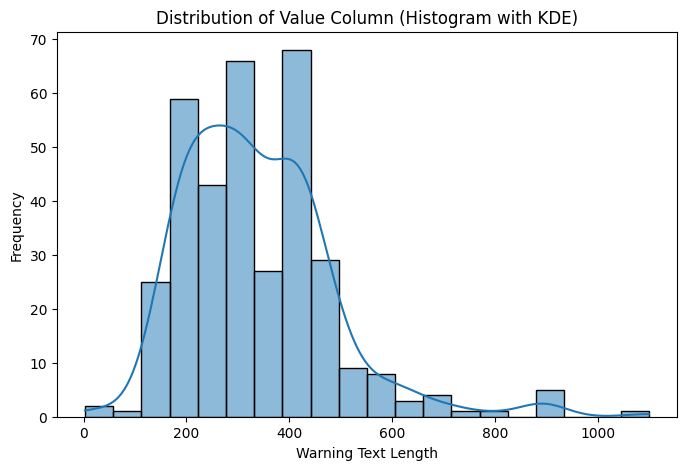

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_warnings, x='warning_text_length', kde=True) # kde=True adds a density curve
plt.title('Distribution of Value Column (Histogram with KDE)')
plt.xlabel('Warning Text Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
df_warnings[['top_section_title','warning_text', 'warning_text_length']].iloc[4]

top_section_title                      Driving stability control systems
warning_text           The system cannot serve as a substitute for th...
warning_text_length                                                  422
Name: 4, dtype: object

In [9]:
df_warnings[['top_section_title','warning_text', 'warning_text_length']].iloc[4]['warning_text']

'The system cannot serve as a substitute for the driver’s personal judgment in assessing the traffic situation. Based on the limits of the system, it cannot independently react to all traffic situations. There is a risk of accident. Adjust driving style to traffic conditions. Watch the surrounding traffic situation closely, be ready to take over steering and braking at any time, and actively intervene where appropriate.'

In [24]:
df_warnings[['top_section_title', 'topic_section']].head(50)

,top_section_title,topic_section
0,Sensors of the vehicle,Radar sensors
1,Driving stability control systems,Operation via M1/M2
2,Driving stability control systems,M MODE
3,Driving stability control systems,M MODE
4,Driving stability control systems,Dynamic Stability Control
5,Driving stability control systems,Dynamic Stability Control
6,Driving stability control systems,M Dynamic Mode
7,Driving stability control systems,M Traction Control
8,Driving stability control systems,M Drift Analyzer
9,Driver assistance systems,Speed Limit Info with no-passing indicator / S...


In [14]:
df_warnings[['top_section_title', 'topic_section', 'warning_text']].iloc[0]

top_section_title                               Sensors of the vehicle
topic_section                                            Radar sensors
warning_text         The vehicle radar sensors and thus also the dr...
Name: 0, dtype: object

In [15]:
df_warnings[['top_section_title', 'topic_section', 'warning_text']].iloc[0]['warning_text']

'The vehicle radar sensors and thus also the driver assistance systems can be impaired by external influences, e.g.,\xa0interference. There is a risk of accident. Watch the surrounding traffic situation closely, be ready to take over steering and braking at any time, and actively intervene where appropriate.'

In [16]:
df_warnings['top_section_title'].value_counts()

top_section_title
Safety                                        50
Wheels and tires                              42
Seats, mirrors and steering wheel             21
Driver assistance systems                     21
Opening and closing                           18
Driving                                       16
Transporting children safely                  16
Parking                                       16
Operating condition of the vehicle            15
Things to remember when driving               15
Charging the vehicle                          13
Cargo area                                    13
Hood / Engine compartment / Under the hood    11
Operating materials                           10
Storage compartments                           8
Driving stability control systems              8
Breakdown Assistance                           7
Replacing components                           6
Information                                    6
Trailer towing                                 5
Na

In [26]:
df_warnings['top_section_title'].value_counts().sum()

np.int64(352)

In [27]:
df_warnings['topic_section'].value_counts().head(40)

topic_section
Drive-ready state                                                                                          13
Hood                                                                                                       10
Changing wheels / Changing wheels/tires                                                                    10
Runflat tires                                                                                               7
Charging the vehicle                                                                                        7
Overview                                                                                                    6
General driving notes                                                                                       6
Seat belts                                                                                                  6
Distance control                                                                                          

In [25]:
df_warnings['top_section_title'].value_counts()

top_section_title
Safety                                        50
Wheels and tires                              42
Seats, mirrors and steering wheel             21
Driver assistance systems                     21
Opening and closing                           18
Driving                                       16
Transporting children safely                  16
Parking                                       16
Operating condition of the vehicle            15
Things to remember when driving               15
Charging the vehicle                          13
Cargo area                                    13
Hood / Engine compartment / Under the hood    11
Operating materials                           10
Storage compartments                           8
Driving stability control systems              8
Breakdown Assistance                           7
Replacing components                           6
Information                                    6
Trailer towing                                 5
Na